# CSC310 Assignment 4
### team 5

In [1]:
%matplotlib inline
import pandas as pd
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.metrics import accuracy_score

In [2]:
epilepsy_df = pd.read_csv('./assets/epilepsy.csv')

In [3]:
epilepsy_df.head()

,Unnamed: 0,ID,Y1,Y2,Y3,Y4,Base,Age,Trt,Ysum,Age10,Base4
0,1,104,5,3,3,3,11,31,placebo,14,3.1,2.75
1,2,106,3,5,3,3,11,30,placebo,14,3.0,2.75
2,3,107,2,4,0,5,6,25,placebo,11,2.5,1.50
3,4,114,4,4,1,4,8,36,placebo,13,3.6,2.00
4,5,116,7,18,9,21,66,22,placebo,55,2.2,16.50


In [4]:
epilepsy_df = epilepsy_df.drop('Unnamed: 0', axis=1)

In [5]:
epilepsy_target = pd.DataFrame(epilepsy_df['Trt'])
epilepsy_features = epilepsy_df.drop('Trt', axis=1)
epilepsy_features = epilepsy_features.drop(['ID','Age10','Base4'], axis=1)

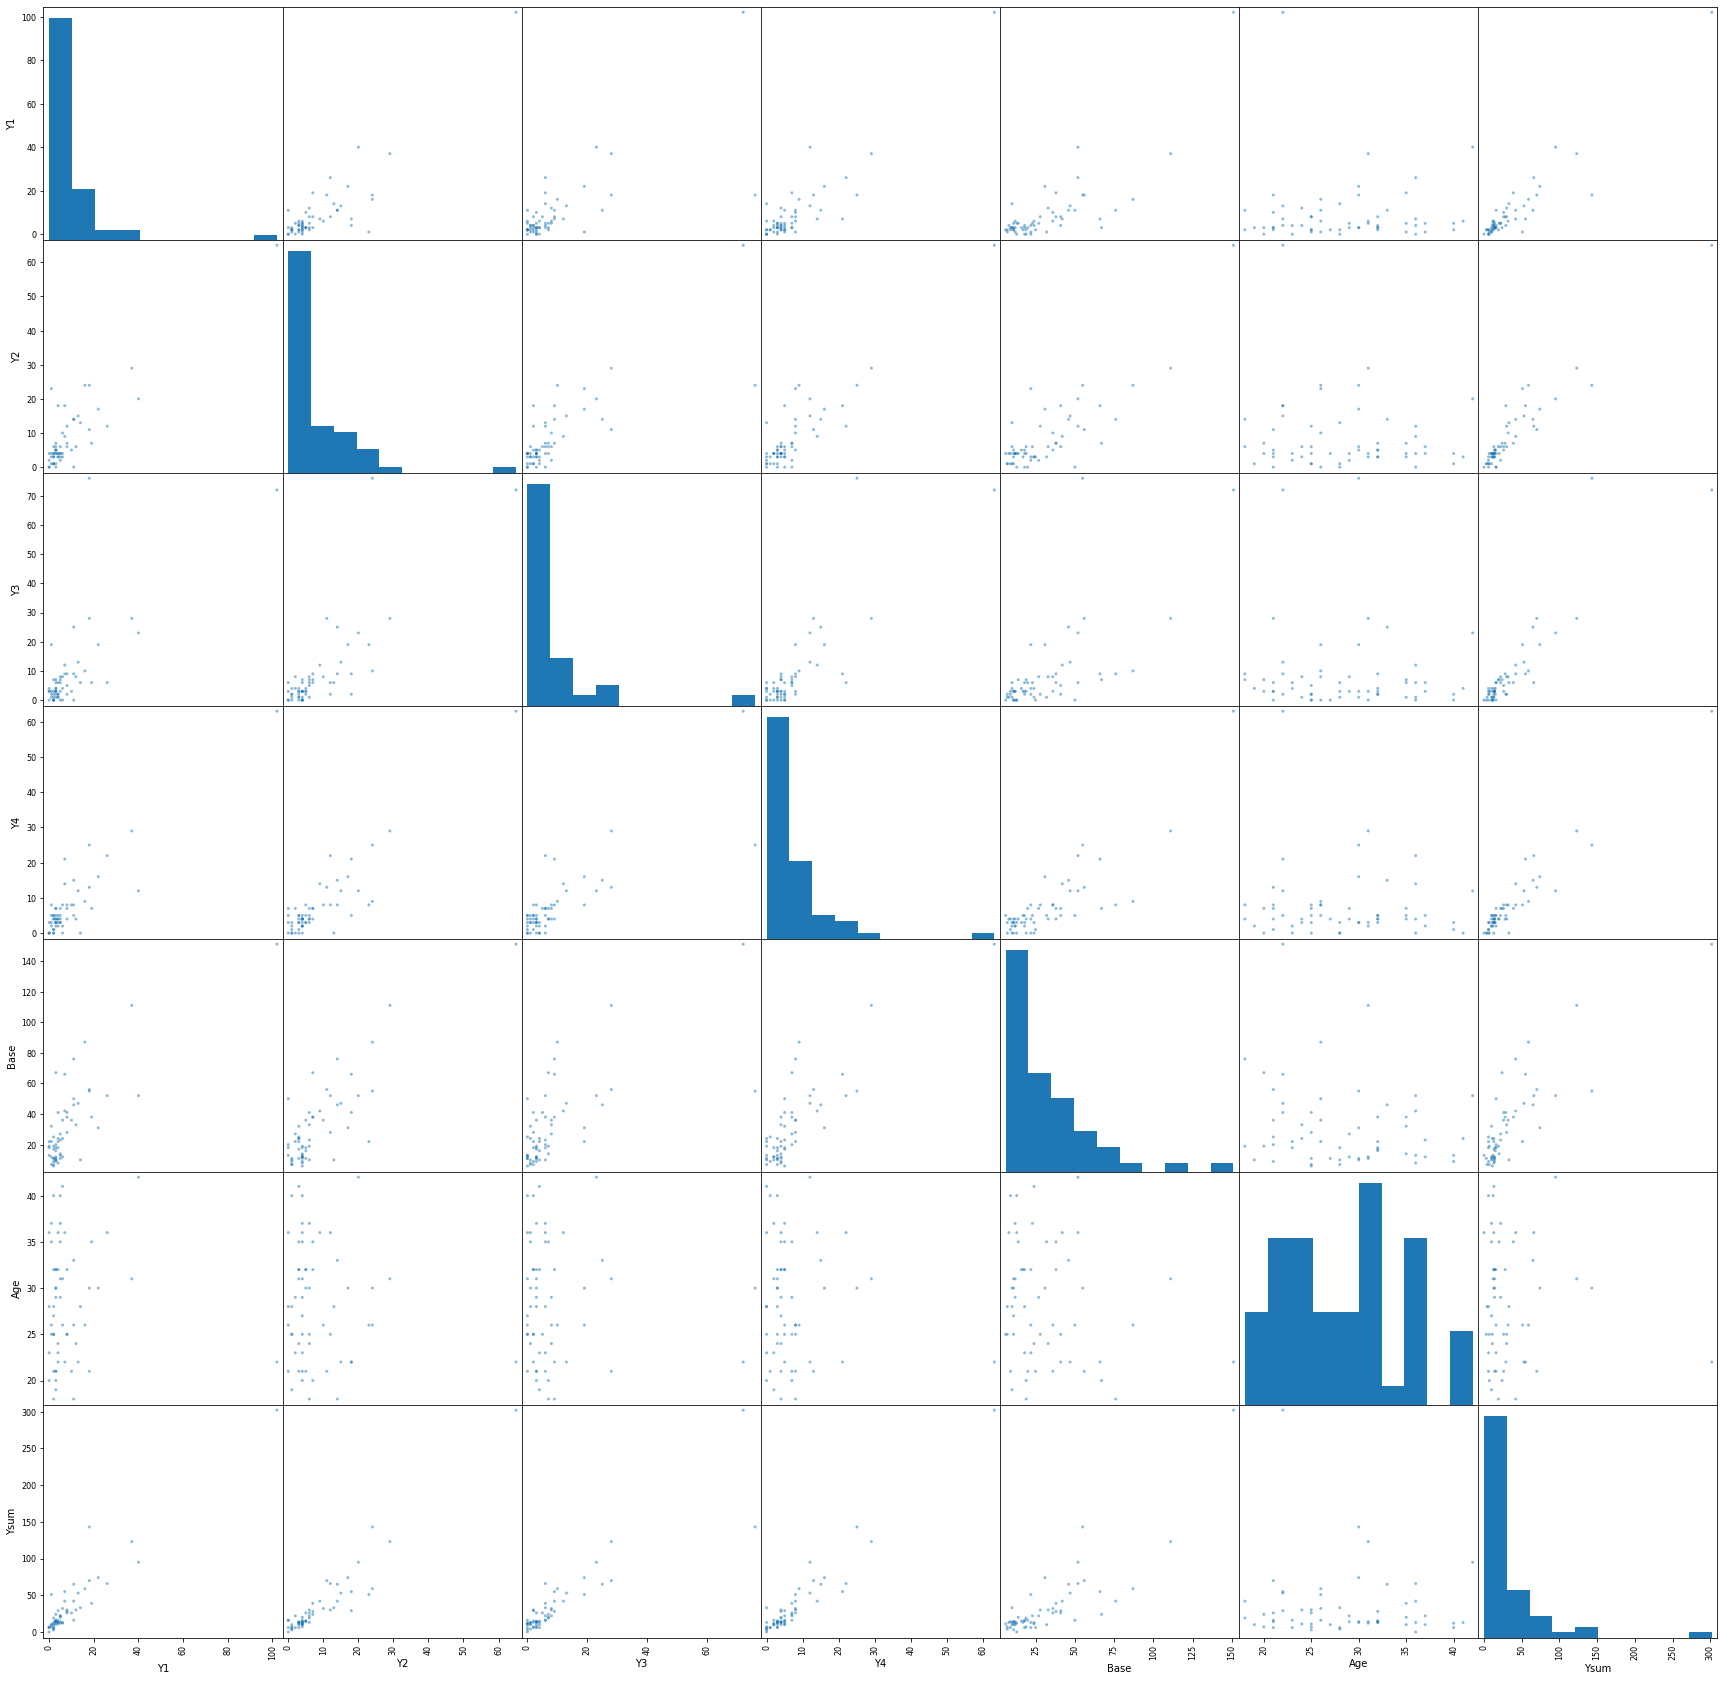

In [6]:
scatter = pd.plotting.scatter_matrix(epilepsy_features, figsize=[30,30])

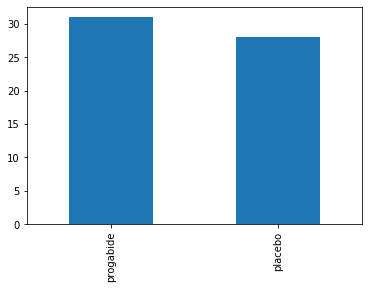

In [7]:
epilepsy_df.loc[:,'Trt'].value_counts().plot.bar()

All of our independent variables except for age is unimodal. Our independent variable age is multimodal. We can identified clusters between variables in our scatter plots except for the scatter where age is one of the variable. There seems to be no cluster between age and any other variables in our model. The clusters are related to our decision tree model from last lab. Our data is balanced.

In [8]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [9]:
dtree.fit(epilepsy_features,epilepsy_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
tree_print(dtree,epilepsy_features)

if Y1 =< 1.5: 
  |then if Y2 =< 0.5: 
  |  |then if Y3 =< 1.5: 
  |  |  |then progabide
  |  |  |else placebo
  |  |else progabide
  |else if Age =< 18.5: 
  |  |then progabide
  |  |else if Ysum =< 5.0: 
  |  |  |then progabide
  |  |  |else if Y2 =< 2.5: 
  |  |  |  |then placebo
  |  |  |  |else if Base =< 12.5: 
  |  |  |  |  |then if Ysum =< 10.5: 
  |  |  |  |  |  |then progabide
  |  |  |  |  |  |else if Y2 =< 5.5: 
  |  |  |  |  |  |  |then placebo
  |  |  |  |  |  |  |else placebo
  |  |  |  |  |else if Age =< 21.5: 
  |  |  |  |  |  |then progabide
  |  |  |  |  |  |else if Base =< 46.5: 
  |  |  |  |  |  |  |then progabide
  |  |  |  |  |  |  |else placebo
<------------------->
Tree Depth:  7


In [11]:
epi_predict = dtree.predict(epilepsy_features)
epi_predict_df = pd.DataFrame(epi_predict)
epi_predict_df.columns = ['Trt']

In [12]:
epi_predict_df.head()

,Trt
0,placebo
1,placebo
2,placebo
3,placebo
4,placebo


In [13]:
print(f"The accuracy is {accuracy_score(epilepsy_target,epi_predict_df)}")

The accuracy is 0.847457627118644


Our new decision tree models does not differ too much from our old model in terms of interpretability. We agree on the major lassificaition